# Airbnb Listings Analysis using SQL

- 🏆 80 points available
- 🤠 Author: Park (ypark32@illinois.edu)
- ✏️ Last updated on 09/21/2022

---

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [63]:
# DO NOT MODIFY THE CODE IN THIS CELL
import base64
import unittest
tc = unittest.TestCase()

---

## 💎 Case overview

![Airbnb logo](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/airbnb-logo-black-background.png?raw=true)

[Airbnb](https://airbnb.com/) is a popular platform for hosts to accommodate guests with short-term stays and leisure activities. It was born in 2008 when the two founders welcomed three guests to their San Francisco home. Airbnb has grown to serve 4 million hosts in about 100,000 cities. That makes Airbnb's valuation worth more than top three hotel chains combined as of December 2020 ([source](https://www.businessinsider.com/airbnb-ipo-valuation-tops-three-hotel-chains-combined-opening-day-2020-12)).

### ⚔️ Your goal

You have recently joined a property management firm as a business development manager. Your role is to establish and deepen relationships with the property owners. Your success on building relationships largely depends on the firm's ability to offer value-adding services to the property owners.

A common concern that most property owners face is dealing with vacant properties. The traditional approach to to fill up vacant properties is to run paid advertisements or to provide sign-up incentives (e.g., free rent for a month if leased for 13+ months, gift cards, referral bonus, free parking). You have a better idea - why not convert some of the vacant properties into vacation rentals?

In this case study, you'll use SQL analyze all Airbnb listings in the city your firm is operating in. Below are some of the questions you'll be answering.

- 👉 Are there properties that can accommodate more than 8 guests?
- 👉 Are there properties that target guests staying over a month?
- 👉 Are there properties that have more than 5 bedrooms and 3 bathrooms?
- 👉 What are the average price, occupancy (availability), and review score by room type?
- 👉 Can you calculate the metrics of interest (number of listings, average price, average occupancy, average review score) by the number of bedrooms?
- 👉 How about by neighbourhoods? Can you also find the average property dimensions (number of bedrooms & bathrooms)?
- 👉 How do the metrics and dimensions differ between superhost and non-superhost listings?
- 👉 Can you find all listings that were never booked?
- 👉 Can you find the top 15 highest-rated listings?
- 👉 Can you find listings with the keyword "bright"?

Note that looking at *just* the listings data is not sufficient to determine whether converting a vacant property to an Airbnb listing is a good idea. The analysis you perform here is preliminary. If you'd like, you can download additional booking data at [http://insideairbnb.com/get-the-data.html](http://insideairbnb.com/get-the-data.html) to explore further on your own.

---

### 🎯 Part 1: Choose a city 🌄

Guess what - you get to pick your own city! 😺 

Go to [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1Yv3acCW6NYgcwVVo55TcgQ-aXcAsSmoVo_Su79xm9Js/edit?usp=sharing) and mark your NetID in any row where the city has not been taken yet (the selection is based on a first-come, first-served basis). Store the copied URL to a new variable named `file_url`.

#### 🔑 Sample Code
```python
file_url = 'https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/Chicago.csv'
```

In [64]:
# YOUR CODE BEGINS
file_url = 'https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/Shanghai.csv'
# YOUR CODE ENDS
print(f'CSV File URL: {file_url}')

CSV File URL: https://github.com/bdi475/datasets/raw/main/case-studies/airbnb-sql/Shanghai.csv


#### 🧭 Check your work

In [65]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-01'
_points = 2

import pandas as pd
df_check = pd.read_csv(file_url)

tc.assertEqual(set(df_check.columns), set(['name', 'neighbourhood', 'room_type', 'bedrooms', 'bathrooms', 
                                           'accommodates', 'minimum_nights', 'price', 'availability_365', 
                                           'number_of_reviews', 'review_score', 'latitude', 'longitude', 'is_superhost']))

tc.assertGreater(df_check.shape[0], 100, 'The city should have at least 100 listings')

---

### 🎯 Part 2: Import packages

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.
    3. `sqlite3`: No alias

In [66]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np
import sqlite3
# YOUR CODE ENDS

#### 🧭 Check your work

In [67]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-02'
_points = 2

import sys

tc.assertIsNotNone(pd.__version__, 'Check whether you have correctly imported Pandas with an alias.')
tc.assertIsNotNone(np.__version__, 'Check whether you have correctly imported NumPy with an alias.')
tc.assertTrue('sqlite3' in globals(), 'Check whether you have correctly imported the sqlite3 package.')

---

### 🔨 Create and populate the `listings` table

▶️ Run the code below to create a new SQLite database. The code will also create and populate the `listings` table.

In [68]:
# DO NOT CHANGE THE CODE BELOW
# Connect to airbnb.db database file
# If the file does not exist, create a new file
conn = sqlite3.connect('airbnb.db')

# Create a cursor
# A cursor enables users of a DBMS to traverse through the result set
# without having to retrieve all results at once
c = conn.cursor()

# Drop (delete) listings table if it already exists
c.execute('DROP TABLE IF EXISTS listings')
conn.commit()

# Create table
# Triple quotes (''') denote multiline strings
create_table_query = '''
CREATE TABLE IF NOT EXISTS listings (
    name TEXT,
    neighbourhood TEXT,
    room_type TEXT,
    bedrooms REAL,
    bathrooms REAL,
    price REAL,
    accommodates INT,
    minimum_nights INT,
    availability_365 INT,
    number_of_reviews INTEGER,
    review_score REAL,
    is_superhost INT,
    latitude REAL,
    longitude REAL
)
'''
c.execute(create_table_query)
conn.commit()

# Populate the listings table
df_listings = pd.read_csv(file_url)
df_listings.to_sql(name='listings', index=False, con=conn, if_exists='append')

conn.close()

#### 🔬 `listings` table column descriptions

| Column Name         | Description                                                              |
|---------------------|--------------------------------------------------------------------------|
| `name`              | Listing title                                                            |
| `neighbourhood`     | Neighbourhood                                                            |
| `room_type`         | Room type (e.g., Shared room, Private room, Entire home/apt, Hotel room) |
| `bedrooms`          | Number of bedrooms                                                       |
| `bathrooms`         | Number of bathrooms                                                      |
| `accommodates`      | Number of maximum guests                                                 |
| `minimum_nights`    | Number of minimum nights required to book                                |
| `price`             | Base nightly price - the actual price will vary by specific dates        |
| `availability_365`  | Number of available days during the past 365 days                        |
| `number_of_reviews` | Total number of reviews                                                  |
| `review_score`      | Guest feedback rating                                                    |
| `latitude`          | Latitude                                                                 |
| `longitude`         | Longitude                                                                |
| `is_superhost`      | Whether the host is a superhost (0 == not a superhost, 1 == superhost)   |

---

### 🎯 Part 3: Select all columns and rows from the `listings` table

#### 👇 Tasks

- ✔️ Write a query that selects all columns and rows from the `listings` table.
- ✔️ Store your query to a new variable named `query_select_all`.

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [69]:
# YOUR CODE BEGINS
query_select_all = '''
SELECT * FROM listings
'''


# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_select_all, con=conn)
display(df_result)
conn.close()

,name,neighbourhood,room_type,bedrooms,bathrooms,price,accommodates,minimum_nights,availability_365,number_of_reviews,review_score,is_superhost,latitude,longitude
0,Heart of French Concession / Home,徐汇区 / Xuhui District,Entire home/apt,1.0,1.0,452.0,3,3,297,85,95.0,1,31.20918,121.45150
1,【sidihome】The minimalist business apt In jing’an,普陀区 / Putuo District,Entire home/apt,1.0,1.0,355.0,2,3,331,26,98.0,1,31.24399,121.44296
2,'Laojia' in the Heart of Shanghai,长宁区 / Changning District,Private room,1.0,1.0,160.0,1,2,89,85,95.0,0,31.22067,121.43159
3,有简约 绿色系 功能齐全 高楼层的绿色舒适7/13双轨交阳光暖窝公寓,静安区 / Jing'an District,Entire home/apt,1.0,1.0,435.0,2,1,350,69,98.0,1,31.24299,121.44358
4,【sidihome】ROSE the big space apt in downtown,静安区 / Jing'an District,Entire home/apt,1.0,1.0,407.0,3,1,330,33,98.0,1,31.24374,121.44247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,"【外滩人民广场高层极简一居】超清投影, 全透明设计, 日式北欧混搭, 全身镜",黄浦区 / Huangpu District,Entire home/apt,1.0,1.0,447.0,2,1,175,13,100.0,0,31.23157,121.48394
7420,M｜投影公寓｜楼下地铁站｜火车站｜虹足｜人广｜南京路｜外滩,虹口区 / Hongkou District,Private room,1.0,1.0,260.0,2,1,87,10,100.0,1,31.26175,121.47771
7421,花筑民宿上海旗舰店/独栋私家别墅/KTV/酒吧/咖啡吧/篝火/烤全羊/私房菜/烧烤/火锅/带厨房,浦东新区 / Pudong,Entire home/apt,9.0,9.0,2975.0,16,1,364,10,100.0,1,31.14009,121.72208
7422,南京路丨外滩5分钟丨豫园丨东方明珠丨人民广场地铁1分钟丨投影丨24H可入住丨双人大床房,黄浦区 / Huangpu District,Entire home/apt,1.0,1.0,170.0,2,1,365,10,92.0,0,31.23415,121.47860


#### 🧭 Check your work

In [70]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-03'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(b'ClNFTEVDVCAqCkZST00gbGlzdGluZ3MK').decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
conn.close()

#### 🚀 Hint

The query below selects all rows and columns from a database table named `my_table`.

```sql
SELECT *
FROM my_table;
```

---

### 🎯 Part 4: Listings that can accommodate 8 or more people

#### 👇 Tasks

- ✔️ Using the `listings` table, find all listings that can accommodate 8 or more people (`accommodates >= 8`).
- ✔️ Select only the following 5 columns (in the same order):
    - `name`, `room_type`, `bedrooms`, `bathrooms`, `accommodates`
- ✔️ Store your query to a new variable named `query_eight_or_more`.
- ✔️ Sort the result by `accommodates` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   |                                       name |       room_type | bedrooms | bathrooms | accommodates |
|--:|-------------------------------------------:|----------------:|---------:|----------:|-------------:|
| 0 |   Elegant Rantoul Oasis: 20 mins to campus | Entire home/apt |      5.0 |       4.0 |           14 |
| 1 |         Exquisite 1980's Historic Building | Entire home/apt |      2.0 |       2.0 |           10 |
| 2 | Quiet Area in Urbana - Perfect for Groups! | Entire home/apt |      3.0 |       2.0 |            8 |
| 3 |     Spacious Champaign Apt w/Pool Gym Wifi | Entire home/apt |      1.0 |       1.0 |            7 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [71]:
# YOUR CODE BEGINS
query_eight_or_more = '''
SELECT name, room_type, bedrooms, bathrooms, accommodates
FROM listings
WHERE accommodates >= 8
ORDER BY accommodates DESC


'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_eight_or_more, con=conn)
display(df_result)
conn.close()

,name,room_type,bedrooms,bathrooms,accommodates
0,八室三厅轰趴聚会 K歌.X-box体感游戏麻将.电影.桌游.乒乓.桌球.火锅.烧烤.钢琴全齐,Entire home/apt,8.0,5.0,16
1,特惠♥好处·别处 | 会议聚会/8小时活动价格/静安寺/顶楼超大露台/老上海里弄/配备齐全,Entire home/apt,1.0,2.0,16
2,Central Party Space市中心超大聚会团建生日会议演示商业拍摄空间免费小食酒水...,Shared room,1.0,1.5,16
3,碧海金沙奉贤海湾大学区五室五厅三卫柒床绿地香颂别墅轰趴-海语小墅壹号,Entire home/apt,5.0,3.0,16
4,上海虹桥精品别墅,Entire home/apt,9.0,9.0,16
...,...,...,...,...,...
472,乐意|下午两点后可接机|温柔是宝藏，你也是|三房一厅|虹桥机场|虹桥火车站|国家会展中心|,Entire home/apt,3.0,1.0,8
473,弄堂里感受老上海风情|太古里|南京西路地铁300米|loft三床可住六人,Entire home/apt,1.0,2.0,8
474,超大空间200平4居3卫嘉善路地铁站3分钟距离。近田子坊、日月光、外滩、静安寺,Entire home/apt,4.0,3.0,8
475,「璀璨外滩·PLUS」超大落地窗270度俯瞰百年外滩全景、听外滩钟声、赏魔都美景、「不接吵闹...,Entire home/apt,3.0,2.5,8


#### 🧭 Check your work

In [72]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-04'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsIGFjY29tbW9kYXRlcwp\
GUk9NIGxpc3RpbmdzCldIRVJFIGFjY29tbW9kYXRlcyA+PSA4Ck9SREVSIEJZIGFjY29tbW9kYXRlcyBERVNDCg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['accommodates'].reset_index(drop=True),
                               df_check['accommodates'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

conn.close()

#### 🚀 Hint

The query below selects 5 columns from `my_table` where `column5` is greater than or equal to 8. The result will be sorted by `column5` in descending order.

```sql
SELECT column1, column2, column3, column4, column5
FROM my_table
WHERE column5 >= 8
ORDER BY column5 DESC;
```

---

### 🎯 Part 5: Average price of all listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the average price of all listings:
- ✔️ Store your query to a new variable named `query_avg_price`.
- ✔️ Result of your query should have only one column and one row.
    - The name of the column does not matter.
    
#### 🔑 Output Format

You are free to rename your `AVG(price)` column.

|   |      AVG(price) |
|--:|----------------:|
| 0 |      145.666667 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [73]:
# YOUR CODE BEGINS
query_avg_price = '''
SELECT AVG(price)
FROM listings
'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_avg_price, con=conn)
display(df_result)
conn.close()

,AVG(price)
0,536.212015


#### 🧭 Check your work

In [74]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-05'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCBBVkcocHJpY2UpCkZST00gbGlzdGluZ3MK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
tc.assertEqual(df_result.iloc[0, 0], df_check.iloc[0, 0], f'Average price should be {df_check.iloc[0, 0]}')
conn.close()

#### 🚀 Hint

The query below calculates the average of `my_column` in `my_table`.

```sql
SELECT AVG(my_column)
FROM my_table;
```

---

### 🎯 Part 6: Long-term stays

#### 👇 Tasks

- ✔️ Using the `listings` table, find all listings with minimum nights of 30 or more (`minimum_nights >= 30`).
- ✔️ Select only the following 7 columns (in the same order):
    - `name`, `room_type`, `bedrooms`, `bathrooms`, `minimum_nights`, `price`, `review_score`
- ✔️ Store your query to a new variable named `query_long_term_stays`.
- ✔️ Sort the result by `price` in ascending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | name                                      | room_type    | bedrooms | bathrooms | minimum_nights | price | review_score |
|---|-------------------------------------------|--------------|----------|-----------|----------------|-------|--------------|
| 0 | Peace within the city for solo travelers  | Private room | 1.0      | 1.0       | 35             | 25.0  | 95.0         |
| 1 | Room close to Downtown Champaign          | Private room | 1.0      | 1.0       | 30             | 33.0  | 95.0         |
| 2 | Perfect spot to work on your next startup | Private room | 1.0      | 1.0       | 30             | 65.0  | 98.0         |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [75]:
# YOUR CODE BEGINS
query_long_term_stays ='''
SELECT name, room_type, bedrooms, bathrooms, minimum_nights, price, review_score
FROM listings
WHERE minimum_nights >= 30
ORDER BY price


'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_long_term_stays, con=conn)
display(df_result)
conn.close()

,name,room_type,bedrooms,bathrooms,minimum_nights,price,review_score
0,地铁16号滴水湖高层复式阳光充沛大床房单间月租,Private room,1.0,1.0,30,66.0,90.0
1,『同济九间之微瑕9/9』上城名都一尘不染特價客廳大空间雙人大床带陽台电视沙发～彗星来的那一晚,Private room,1.0,1.0,30,99.0,94.0
2,【浅色系极简】（月租）两居室中的独立房间，复式结构，地铁直达徐家汇。,Private room,1.0,1.5,30,107.0,97.0
3,《一叶知秋苑》一湾秋月半院光,Private room,1.0,1.0,30,113.0,100.0
4,九号地铁附近带独立阳台随机分配大床房@虹桥火车站机场,Private room,1.0,1.0,30,118.0,89.0
...,...,...,...,...,...,...,...
279,静安福邸•浮掠静安百年风华南京西路地铁口独幢6室3卫露台庭院古董家俬文艺老洋房,Entire home/apt,6.0,3.0,180,3642.0,97.0
280,"A单间-紧挨市中心内环地铁口步行2分钟,地段好去哪里都方便,快捷且阳光,干净,温馨,舒适",Private room,1.0,1.0,80,3999.0,97.0
281,（全面消毒）「书的房 」 180°落地窗东方明珠景观四居室|步行城隍庙豫园地铁站步行5分钟,Entire home/apt,4.0,2.0,60,9999.0,100.0
282,（全面消毒）「书的房 」180°落地窗东方明珠景观四居室|豫园地铁站步行5分钟,Entire home/apt,4.0,2.0,60,9999.0,100.0


#### 🧭 Check your work

In [76]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-06'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsIG1pbmltdW1fbmlnaHRz\
LCBwcmljZSwgcmV2aWV3X3Njb3JlCkZST00gbGlzdGluZ3MKV0hFUkUgbWluaW11bV9uaWdodHMgPj0gMzAKT1JERVIgQlkgcHJpY2UK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['price'].reset_index(drop=True),
                               df_check['price'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))

conn.close()

#### 🚀 Hint

The query below selects 7 columns from `my_table` where `column5` is greater than or equal to 30. The result will be sorted by `column6` in ascending order.

```sql
SELECT column1, column2, column3, column4, column5, column6, column7
FROM my_table
WHERE column5 >= 30
ORDER BY column6;
```

---

### 🎯 Part 7: Large listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find all rows where the listing has:
    - 6 or more bedrooms
    - **AND** 4 or more bathrooms
- ✔️ Select only the following 5 columns (in the same order):
    - `name`, `bedrooms`, `bathrooms`, `price`, `review_score`
- ✔️ Store your query to a new variable named `query_large_listings`.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.


|   |                                   name | bedrooms | bathrooms | price | review_score |
|--:|---------------------------------------:|---------:|----------:|------:|-------------:|
| 0 |     5 min away from Downtown Champaign |      6.0 |       4.0 | 550.4 |         99.0 |
| 1 |   Large Bedroom & Bath close to campus |      6.0 |       5.0 | 483.0 |         98.0 |
| 2 | Big family welcomed, graduation season |      6.0 |       4.5 | 379.9 |         94.0 |
| 3 |                   LARGEST HOME IN TOWN |      8.0 |       7.0 | 600.0 |         93.0 |

#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [77]:
# YOUR CODE BEGINS
query_large_listings = '''
SELECT name, bedrooms, bathrooms, price, review_score FROM listings 
WHERE bedrooms >= 6 AND bathrooms >= 4

'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_large_listings, con=conn)
display(df_result)
conn.close()

,name,bedrooms,bathrooms,price,review_score
0,八室三厅轰趴聚会 K歌.X-box体感游戏麻将.电影.桌游.乒乓.桌球.火锅.烧烤.钢琴全齐,8.0,5.0,2488.0,99.0
1,漫乡居：位于淀山湖饮用水源保护区内可以看萤火虫的水乡民宿,6.0,7.0,2857.0,96.0
2,崇明海洪园民宿（整栋别墅）,6.0,6.0,2278.0,95.0
3,上海虹桥精品别墅,9.0,9.0,2986.0,92.0
4,独栋九室两厅花园别墅/团建、烧烤、娱乐/迪士尼/免费早餐/每日消毒/设计师精品民宿/可做饭,9.0,9.5,4963.0,100.0
...,...,...,...,...,...
107,独栋 全屋地暖【泳池｜麻将｜BBQ烧烤｜KTV｜桌游｜大投影】团建聚会拍摄生日求婚｜毗邻迪士尼,6.0,6.0,1751.0,100.0
108,迪士尼乐园接送\乳胶床垫枕头\品牌卫浴\独栋别墅团建、聚会、烧烤\可住10一2O人\环境优雅舒适,8.0,7.0,1784.0,100.0
109,POP-粉色复古式花园独栋轰趴别墅/KTV泳池烧烤麻将桌游/提供厨师餐宴服务/接商拍,8.0,9.0,3842.0,99.0
110,以粉为主色调，设计师精心打造的复古风花园独栋别墅，配KTV、泳池、烧烤、餐宴、麻将，接轰趴团建商拍,8.0,8.5,5190.0,100.0


#### 🧭 Check your work

In [78]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-07'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCBiZWRyb29tcywgYmF0aHJvb21zLCBwcmljZSwgcmV2aWV3X3Njb3JlCkZST00gb\
GlzdGluZ3MKV0hFUkUgKGJlZHJvb21zID49IDYpIEFORCAoYmF0aHJvb21zID49IDQpCg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

#### 🚀 Hint

The query below selects 5 columns from `my_table` where `column2` is greater than or equal to 6 and `column3` is greater than or equal to 4.

```sql
SELECT column1, column2, column3, column4, column5
FROM my_table
WHERE (column2 >= 6) AND (column3 >= 4);
```

---

### 🎯 Part 8: Average price of large listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the average price of listings with:
    - 6 or more bedrooms
    - **AND** 4 or more bathrooms
- ✔️ Store your query to a new variable named `query_large_listings_avg_price`.
- ✔️ The result of your query should have only one column and one row.
    - The name of the column does not matter.
    
#### 🔑 Output Format

Your query result may have a different column name.

|   | AVG(price) |
|--:|-----------:|
| 0 |      475.5 |


#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [79]:
# YOUR CODE BEGINS
query_large_listings_avg_price ='''
SELECT AVG(price) FROM listings WHERE bedrooms >= 6 and bathrooms >=4

'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_large_listings_avg_price, con=conn)
display(df_result)
conn.close()

,AVG(price)
0,3092.919643


#### 🧭 Check your work

In [80]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-08'
_points = 5

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCBBVkcocHJpY2UpCkZST00gbGlzdGluZ3MKV0hFUkUgKGJlZHJvb21zID49IDYpIEFORCAoYmF0aHJvb21zID49IDQpCg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
tc.assertEqual(df_result.iloc[0, 0], df_check.iloc[0, 0], f'Average price should be {df_check.iloc[0, 0]}')
conn.close()

#### 🚀 Hint

The query below calculates the average of `column4` where `column2` is greater or equal to 6 and `column3` is greater or equal to 4.

```sql
SELECT AVG(column4)
FROM my_table
WHERE (column2 >= 6) AND (column3 >= 4);
```

---

### 🎯 Part 9: Number of listings by neighbourhood

#### 👇 Tasks

- ✔️ Using the `listings` table, find the number of listings by `neighbourhood`.
- ✔️ Store your query to a new variable named `query_num_listings_by_neighbourhood`.
- ✔️ The result of your query should have the following two columns:
    - `neighbourhood`
    - `num_listings`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings |
|--:|--------------:|-------------:|
| 0 |     Champaign |           60 |
| 1 |        Urbana |           50 |
| 2 |         Savoy |           30 |
| 3 |        Fisher |           20 |

#### 🔥 No hint

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [81]:
# YOUR CODE BEGINS
query_num_listings_by_neighbourhood ='''
SELECT neighbourhood, COUNT(neighbourhood) as num_listings FROM listings
GROUP BY neighbourhood
ORDER BY num_listings DESC

'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_num_listings_by_neighbourhood, con=conn)
display(df_result)
conn.close()

,neighbourhood,num_listings
0,浦东新区 / Pudong,2863
1,黄浦区 / Huangpu District,1361
2,徐汇区 / Xuhui District,773
3,静安区 / Jing'an District,645
4,长宁区 / Changning District,294
5,虹口区 / Hongkou District,256
6,闵行区 / Minhang District,223
7,松江区 / Songjiang District,222
8,杨浦区 / Yangpu District,170
9,青浦区 / Qingpu District,150


#### 🧭 Check your work

In [82]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-09'
_points = 5

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuZWlnaGJvdXJob29kLCBDT1VOVCgqKSBhcyBudW1fbGlzdGluZ3MKRlJPTSBsaXN0aW\
5ncwpHUk9VUCBCWSBuZWlnaGJvdXJob29kCk9SREVSIEJZIG51bV9saXN0aW5ncyBERVNDOwo='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                               df_check['num_listings'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

#### 🚀 Hint

Assuming that the `listings` table has a `city` column, the query below counts the number of listings for each `city`. It sorts the result by `num_listings` in descending order.

```sql
SELECT city, COUNT(*) AS num_listings
FROM listings
GROUP BY city
ORDER BY num_listings DESC;
```

---

### 🎯 Part 10: Number of superhost/non-superhost listings

#### 👇 Tasks

- ✔️ Using the `listings` table, find the number of listings of superhost/non-superhost.
- ✔️ Store your query to a new variable named `query_num_listings_by_host_status`.
- ✔️ The result of your query should have the following two columns:
    - `is_superhost`: `0` or `1`
    - `num_listings`
- ✔️ Sort the result by `is_superhost` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values.


|   | is_superhost | num_listings |
|--:|-------------:|-------------:|
| 0 |            0 |          500 |
| 1 |            1 |          400 |

#### 💣 No hint

Try this one on your own!

In [83]:
# YOUR CODE BEGINS
query_num_listings_by_host_status = '''
SELECT is_superhost,COUNT(*) as num_listings FROM listings GROUP BY is_superhost ORDER BY is_superhost 
'''


# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_num_listings_by_host_status, con=conn)
display(df_result)
conn.close()

,is_superhost,num_listings
0,0,3008
1,1,4416


#### 🧭 Check your work

In [84]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-10'
_points = 4

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCBpc19zdXBlcmhvc3QsIENPVU5UKCopIGFzIG51bV9saXN0aW5ncwpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIGlzX3N1cGVyaG9zdApPUkRFUiBCWSBpc19zdXBlcmhvc3Q7Cg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['is_superhost'].reset_index(drop=True),
                               df_check['is_superhost'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

## 💵 Metrics of interest

In this part, you will analyze the key metrics of rental properties such as occupancy rate (`availability_365`), rental rates (`price`), and guest feedback (`review_score`).

---

### 🎯 Part 11: Metrics by room types

#### 👇 Tasks

- ✔️ Using the `listings` table, find the **averages** of following three columns by `room_type`:
    - `price`
    - `availability_365`
    - `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_room_type`.
- ✔️ The result of your query should have the following 4 columns (in the same order):
    - `room_type`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `avg_availability` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values and may have different number of rows.

|   |       room_type |  avg_price | avg_availability | avg_review_score |
|--:|----------------:|-----------:|-----------------:|-----------------:|
| 0 |     Shared room |  40.100000 |       162.821215 |        95.491510 |
| 1 |    Private room |  60.236737 |       189.997992 |        95.500100 |
| 2 | Entire home/apt | 104.599667 |       225.127593 |        92.105033 |
| 3 |      Hotel room |  66.666667 |       310.444444 |        88.666667 |


#### 🔥 Need help?

Refer to the 🚀 **Hint** section below the 🧭 **Check your work** code cell.

In [85]:
# YOUR CODE BEGINS
query_metrics_by_room_type = '''
SELECT room_type, AVG(price) as avg_price, AVG(availability_365) as avg_availability, AVG(review_score) as avg_review_score FROM listings
GROUP BY room_type ORDER BY avg_availability
'''






# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_room_type, con=conn)
display(df_result)
conn.close()

,room_type,avg_price,avg_availability,avg_review_score
0,Entire home/apt,640.233933,203.951585,95.945801
1,Private room,374.698688,211.971065,97.718750
2,Shared room,128.091463,223.475610,95.737805


#### 🧭 Check your work

In [86]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-11'
_points = 5

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
    b'ClNFTEVDVCAKICAgIHJvb21fdHlwZSwKICAgIEFWRyhwcmljZSkgQVMgYXZnX3ByaWNlLCAKICAgIEFWRyhhdmFpbGFiaWxpdHlfMzY1KSBBUyBhdmdfYXZhaWxhYmlsaXR5LCAKICAgIEFWRyhyZXZpZXdfc2NvcmUpIEFTIGF2Z19yZXZpZXdfc2NvcmUKRlJPTSBsaXN0aW5ncwpHUk9VUCBCWSByb29tX3R5cGUKT1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eTsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

#### 🚀 Hint

Below is a **fully-functional** solution query. You do not have to change anything.

```sql
SELECT 
    room_type, 
    AVG(price) AS avg_price, 
    AVG(availability_365) AS avg_availability, 
    AVG(review_score) AS avg_review_score
FROM listings
GROUP BY room_type
ORDER BY avg_availability;
```

---

### 🎯 Part 12: Metrics by number of bedrooms

#### 👇 Tasks

- ✔️ Using the `listings` table, find the following measures by the number of bedrooms (`bedrooms`):
    - Count of rows (number of listings)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_bedrooms`.
- ✔️ The result of your query should have the following 5 columns (in the same order):
    - `bedrooms`
    - `num_listings`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `bedrooms` in ascending order.

#### 🔑 Output Format

Your query result will likely have different cell values and may have different number of rows.

|   | bedrooms | num_listings |  avg_price | avg_availability | avg_review_score |
|--:|---------:|-------------:|-----------:|-----------------:|-----------------:|
| 0 |      1.0 |          524 |  95.839695 |       218.353053 |        94.398855 |
| 1 |      2.0 |          207 | 143.144928 |       202.579710 |        94.275362 |
| 2 |      3.0 |           98 | 227.326531 |       211.755102 |        96.285714 |
| 3 |      4.0 |           27 | 364.111111 |       205.592593 |        95.481481 |
| 4 |      5.0 |            9 | 491.555556 |       245.333333 |        95.666667 |
| 5 |      6.0 |            4 | 477.250000 |       262.500000 |        96.500000 |


#### 💣 No hint

Try this one on your own!

In [87]:
# YOUR CODE BEGINS

query_metrics_by_bedrooms = '''
SELECT bedrooms, COUNT(*) as num_listings, AVG(price) as avg_price, AVG(availability_365) as avg_availability, AVG(review_score) as avg_review_score FROM listings
GROUP BY bedrooms ORDER BY bedrooms
'''

# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_bedrooms, con=conn)
display(df_result)
conn.close()

,bedrooms,num_listings,avg_price,avg_availability,avg_review_score
0,1.0,5433,397.923799,207.687465,96.614394
1,2.0,1228,549.054560,201.119707,96.145765
2,3.0,424,986.596698,213.398585,96.544811
3,4.0,159,1495.509434,194.213836,96.767296
4,5.0,59,1963.305085,216.745763,96.474576
5,6.0,32,2259.187500,233.468750,97.906250
6,7.0,28,3119.392857,218.785714,97.964286
7,8.0,24,2829.041667,231.583333,98.291667
8,9.0,17,3412.823529,250.705882,99.000000
9,10.0,10,3574.300000,237.000000,98.100000


#### 🧭 Check your work

In [88]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-12'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIGJlZHJvb21zLAogICAgQ09VTlQoKikgQVMgbnVtX2xpc3RpbmdzLAogICAgQVZHKHByaWN\
lKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2YWlsYWJpbGl0eV8zNjUpIEFTIGF2Z19hdmFpbGFiaWxpdHksIAog\
ICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY29yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIGJlZHJvb21zCk9SREVSIEJZIGJlZHJvb21zOwo='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 13: Metrics by neighbourhood

#### 👇 Tasks

- ✔️ Using the `listings` table, find the following measures by the neighbourhood (`neighbourhood`):
    - Count of rows (number of listings)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_metrics_by_neighbourhood`.
- ✔️ The result of your query should have the following 5 columns (in the same order):
    - `neighbourhood`
    - `num_listings`
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings |  avg_price | avg_availability | avg_review_score |
|--:|--------------:|-------------:|-----------:|-----------------:|-----------------:|
| 0 |     Champaign |          107 | 120.299065 |       238.392523 |        93.504673 |
| 1 |        Urbana |           75 |  88.938776 |       197.938776 |        95.306122 |
| 2 |       Mahomet |           41 |  95.347826 |       237.304348 |        93.000000 |
| 3 |       Rantoul |           26 | 287.000000 |       195.166667 |        97.166667 |

#### 💣 No hint

Try this one on your own!

In [89]:
# YOUR CODE BEGINS
query_metrics_by_neighbourhood = '''
SELECT neighbourhood, COUNT(*) as num_listings, AVG(price) as avg_price, AVG(availability_365) as avg_availability, AVG(review_score) as avg_review_score FROM listings
GROUP BY neighbourhood ORDER BY num_listings DESC
'''



# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_metrics_by_neighbourhood, con=conn)
display(df_result)
conn.close()

,neighbourhood,num_listings,avg_price,avg_availability,avg_review_score
0,浦东新区 / Pudong,2863,470.851904,214.616486,97.564094
1,黄浦区 / Huangpu District,1361,677.257899,194.774431,95.070536
2,徐汇区 / Xuhui District,773,543.774903,194.311772,95.943079
3,静安区 / Jing'an District,645,497.606202,214.325581,95.973643
4,长宁区 / Changning District,294,588.578231,180.438776,96.129252
5,虹口区 / Hongkou District,256,453.078125,156.113281,95.355469
6,闵行区 / Minhang District,223,488.847534,211.295964,96.582960
7,松江区 / Songjiang District,222,438.860360,234.135135,96.815315
8,杨浦区 / Yangpu District,170,308.558824,199.405882,96.429412
9,青浦区 / Qingpu District,150,689.800000,214.440000,96.693333


#### 🧭 Check your work

In [90]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-13'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAg\
ICBBVkcocHJpY2UpIEFTIGF2Z19wcmljZSwgCiAgICBBVkcoYXZhaWxhYmlsaXR5XzM2NSkgQVMgYXZnX2\
F2YWlsYWJpbGl0eSwgCiAgICBBVkcocmV2aWV3X3Njb3JlKSBBUyBhdmdfcmV2aWV3X3Njb3JlCkZST00g\
bGlzdGluZ3MKR1JPVVAgQlkgbmVpZ2hib3VyaG9vZApPUkRFUiBCWSBudW1fbGlzdGluZ3MgREVTQzsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                               df_check['num_listings'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 14: Metrics by neighbourhood, expanded

#### 👇 Tasks
- ✔️ This time, you will include more details on the listing size (average number of bedrooms, bathrooms, accommodations).
- ✔️ Using the `listings` table, find the following measures by the neighbourhood (`neighbourhood`):
    - Count of rows (number of listings)
    - Average number of `bedrooms`
    - Average number of `bathrooms`
    - Average number of maximum guests (average of `accommodates`)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_details_by_neighbourhood`.
- ✔️ The result of your query should have the following 8 columns (in the same order):
    - `neighbourhood`
    - `num_listings`
    - `avg_bedrooms`,
    - `avg_bathrooms`,
    - `avg_accommodates`,
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `num_listings` in descending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | neighbourhood | num_listings | avg_bedrooms | avg_bathrooms | avg_accommodates |  avg_price | avg_availability | avg_review_score |
|--:|--------------:|-------------:|-------------:|--------------:|-----------------:|-----------:|-----------------:|-----------------:|
| 0 |     Champaign |          107 |     1.736842 |      1.552632 |         4.771930 | 108.192982 |       186.982456 |        95.631579 |
| 1 |        Urbana |           75 |     1.500000 |      1.166667 |         3.666667 | 117.666667 |       212.666667 |        98.333333 |
| 2 |       Mahomet |           41 |     1.333333 |      1.500000 |         2.333333 |  49.000000 |        31.666667 |        98.333333 |
| 3 |       Rantoul |           26 |     1.000000 |      1.000000 |         2.000000 |  29.000000 |       322.500000 |        96.000000 |

#### 🔥 Need help?

The query will build upon the previous part and will be highly similar.

In [91]:
# YOUR CODE BEGINS
query_details_by_neighbourhood = '''
SELECT neighbourhood, COUNT(*) as num_listings, AVG(bedrooms) as avg_bedrooms, AVG(bathrooms) as avg_bathrooms, AVG(accommodates) as avg_accommodates,
avg(price) as avg_price, avg(availability_365) as avg_availability, avg(review_score) as avg_review_score FROM listings
GROUP BY neighbourhood ORDER BY num_listings DESC










'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_details_by_neighbourhood, con=conn)
display(df_result)
conn.close()

,neighbourhood,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,浦东新区 / Pudong,2863,1.538247,1.396961,3.578414,470.851904,214.616486,97.564094
1,黄浦区 / Huangpu District,1361,1.465099,1.202425,3.538575,677.257899,194.774431,95.070536
2,徐汇区 / Xuhui District,773,1.285899,1.137128,2.843467,543.774903,194.311772,95.943079
3,静安区 / Jing'an District,645,1.241860,1.154264,2.910078,497.606202,214.325581,95.973643
4,长宁区 / Changning District,294,1.272109,1.144558,2.636054,588.578231,180.438776,96.129252
5,虹口区 / Hongkou District,256,1.304688,1.175781,3.367188,453.078125,156.113281,95.355469
6,闵行区 / Minhang District,223,1.461883,1.318386,2.950673,488.847534,211.295964,96.582960
7,松江区 / Songjiang District,222,1.851351,1.488739,3.292793,438.860360,234.135135,96.815315
8,杨浦区 / Yangpu District,170,1.323529,1.182353,3.011765,308.558824,199.405882,96.429412
9,青浦区 / Qingpu District,150,2.040000,1.873333,4.626667,689.800000,214.440000,96.693333


#### 🧭 Check your work

In [92]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-14'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAgICBBVkcoYmVkcm9vbXMpI\
GFzIGF2Z19iZWRyb29tcywKICAgIEFWRyhiYXRocm9vbXMpIGFzIGF2Z19iYXRocm9vbXMsCiAgICBBVkcoYWNjb21tb2RhdGVzKSBh\
cyBhdmdfYWNjb21tb2RhdGVzLAogICAgQVZHKHByaWNlKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2YWlsYWJpbGl0eV8zNjUpIEF\
TIGF2Z19hdmFpbGFiaWxpdHksIAogICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY29yZQpGUk9NIGxpc3RpbmdzCk\
dST1VQIEJZIG5laWdoYm91cmhvb2QKT1JERVIgQlkgbnVtX2xpc3RpbmdzIERFU0M7Cg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['num_listings'].reset_index(drop=True),
                               df_check['num_listings'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 15: Metrics by host status, expanded

#### 👇 Tasks
- ✔️ This time, you will repeat the previous analysis using `is_superhost` instead of `neighbourhood`.
- ✔️ Using the `listings` table, find the following measures by the host status (`is_superhost`):
    - Count of rows (number of listings)
    - Average number of `bedrooms`
    - Average number of `bathrooms`
    - Average number of maximum guests (average of `accommodates`)
    - Average `price`
    - Average `availability_365`
    - Average `review_score`
- ✔️ Store your query to a new variable named `query_details_by_host_status`.
- ✔️ The result of your query should have the following 8 columns (in the same order):
    - `is_superhost`
    - `num_listings`
    - `avg_bedrooms`,
    - `avg_bathrooms`,
    - `avg_accommodates`,
    - `avg_price`
    - `avg_availability`
    - `avg_review_score`
- ✔️ Sort the result by `is_superhost` in ascending order.

#### 🔑 Output Format

Your query result will likely have different number of rows and cell values.

|   | is_superhost | num_listings | avg_bedrooms | avg_bathrooms | avg_accommodates |  avg_price | avg_availability | avg_review_score |
|--:|-------------:|-------------:|-------------:|--------------:|-----------------:|-----------:|-----------------:|-----------------:|
| 0 |            0 |          400 |     1.465113 |      1.630648 |         4.132415 | 132.887151 |       220.066667 |        93.015012 |
| 1 |            1 |          500 |     1.357654 |      1.554667 |         5.142551 | 144.887511 |       193.269997 |        97.425115 |

In [93]:
# YOUR CODE BEGINS
query_details_by_host_status = '''
SELECT is_superhost, COUNT(*) as num_listings, AVG(bedrooms) as avg_bedrooms, AVG(bathrooms) as avg_bathrooms, AVG(accommodates) as avg_accommodates,
avg(price) as avg_price, avg(availability_365) as avg_availability, avg(review_score) as avg_review_score FROM listings
GROUP BY is_superhost ORDER BY is_superhost
'''


# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_details_by_host_status, con=conn)
display(df_result)
conn.close()

,is_superhost,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,0,3008,1.478723,1.261469,3.430186,609.829455,213.746011,94.435173
1,1,4416,1.504982,1.376245,3.415082,486.066803,202.712183,98.007699


#### 🧭 Check your work

In [94]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-15'
_points = 6

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIGlzX3N1cGVyaG9zdCwKICAgIENPVU5UKCopIEFTIG51bV9saXN0aW5ncywKICAgIEFWRyhiZWRyb29tcy\
kgYXMgYXZnX2JlZHJvb21zLAogICAgQVZHKGJhdGhyb29tcykgYXMgYXZnX2JhdGhyb29tcywKICAgIEFWRyhhY2NvbW1vZGF0ZX\
MpIGFzIGF2Z19hY2NvbW1vZGF0ZXMsCiAgICBBVkcocHJpY2UpIEFTIGF2Z19wcmljZSwgCiAgICBBVkcoYXZhaWxhYmlsaXR5Xz\
M2NSkgQVMgYXZnX2F2YWlsYWJpbGl0eSwgCiAgICBBVkcocmV2aWV3X3Njb3JlKSBBUyBhdmdfcmV2aWV3X3Njb3JlCkZST00gbG\
lzdGluZ3MKR1JPVVAgQlkgaXNfc3VwZXJob3N0Ck9SREVSIEJZIGlzX3N1cGVyaG9zdDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['is_superhost'].reset_index(drop=True),
                               df_check['is_superhost'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

## 🐳 More queries!

In this part, you will try out queries that calculate metrics of interest by more than one criteria. In Pandas terms, this would be grouping by more than one column.

**The fully-working query for each part will be given to you.** Your task is to *try* to understand what each query does. 🐬

![SQL Query Meme](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/my-sql-query-meme-01.jpg?raw=true)

---

### 🎯 Part 16: Metrics by neighbourhood + room type

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_neighbourhood_room_type`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-neighbourhood-room-type-popularity-01.png?raw=true)

In [95]:
# YOUR CODE BEGINS

query_neighbourhood_room_type ='''
SELECT
  neighbourhood,
  room_type,
  COUNT(*) as num_listings,
  AVG(bedrooms) as avg_bedrooms,
  AVG(bathrooms) as avg_bathrooms,
  AVG(accommodates) as avg_accommodates,
  AVG(price) as avg_price,
  AVG(availability_365) as avg_availability,
  AVG(review_score) as avg_review_score
FROM listings
GROUP BY neighbourhood, room_type
Having num_listings>20
ORDER BY avg_availability
LIMIT 10



'''


# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_neighbourhood_room_type, con=conn)
display(df_result)
conn.close()

,neighbourhood,room_type,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,虹口区 / Hongkou District,Entire home/apt,218,1.353211,1.199541,3.568807,495.784404,151.490826,95.344037
1,长宁区 / Changning District,Entire home/apt,205,1.375610,1.131707,3.048780,497.526829,179.931707,95.756098
2,徐汇区 / Xuhui District,Private room,141,1.014184,1.099291,1.843972,698.553191,183.269504,96.496454
3,长宁区 / Changning District,Private room,80,1.037500,1.187500,1.750000,862.800000,185.087500,97.262500
4,虹口区 / Hongkou District,Private room,31,1.032258,1.048387,2.000000,232.032258,185.741935,95.225806
5,杨浦区 / Yangpu District,Private room,61,1.000000,1.180328,1.754098,183.950820,187.508197,97.016393
6,黄浦区 / Huangpu District,Entire home/apt,1199,1.518766,1.203503,3.729775,724.194329,191.794829,94.950792
7,黄浦区 / Huangpu District,Private room,114,1.096491,1.166667,2.271930,399.473684,193.271930,95.833333
8,徐汇区 / Xuhui District,Entire home/apt,616,1.355519,1.146104,3.108766,519.508117,196.165584,95.813312
9,崇明区 / Chongming District,Entire home/apt,100,4.240000,3.825000,9.490000,1718.570000,203.710000,97.970000


#### 🧭 Check your work

In [96]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-16'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICByb29tX3R5cGUsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3MsCiAg\
ICBBVkcoYmVkcm9vbXMpIGFzIGF2Z19iZWRyb29tcywKICAgIEFWRyhiYXRocm9vbXMpIGFzIGF2Z19iYXRocm9vbXMsCiAgICBBVk\
coYWNjb21tb2RhdGVzKSBhcyBhdmdfYWNjb21tb2RhdGVzLAogICAgQVZHKHByaWNlKSBBUyBhdmdfcHJpY2UsIAogICAgQVZHKGF2\
YWlsYWJpbGl0eV8zNjUpIEFTIGF2Z19hdmFpbGFiaWxpdHksIAogICAgQVZHKHJldmlld19zY29yZSkgQVMgYXZnX3Jldmlld19zY2\
9yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIG5laWdoYm91cmhvb2QsIHJvb21fdHlwZQpIQVZJTkcgbnVtX2xpc3RpbmdzID4gMjAK\
T1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eQpMSU1JVCAxMDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 17: Rounded metrics by neighbourhood + room type

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_neighbourhood_room_type_rounded`.
- ✔️ The query below performs identical tasks to the previous deliverable, but rounds up the numbers to 1 decimal place.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-neighbourhood-room-type-popularity-rounded-01.png?raw=true)

In [97]:
# YOUR CODE BEGINS



query_neighbourhood_room_type_rounded ='''
SELECT
  neighbourhood,
  room_type,
  COUNT(*) as num_listings,
  round(AVG(bedrooms),1) as avg_bedrooms,
  round(AVG(bathrooms),1) as avg_bathrooms,
  round(AVG(accommodates),1) as avg_accommodates,
  round(AVG(price),1) as avg_price,
  round(AVG(availability_365),1) as avg_availability,
  round(AVG(review_score),1) as avg_review_score
FROM listings
GROUP BY neighbourhood, room_type
Having num_listings>20
ORDER BY avg_availability
LIMIT 10



'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_neighbourhood_room_type_rounded, con=conn)
display(df_result)
conn.close()

,neighbourhood,room_type,num_listings,avg_bedrooms,avg_bathrooms,avg_accommodates,avg_price,avg_availability,avg_review_score
0,虹口区 / Hongkou District,Entire home/apt,218,1.4,1.2,3.6,495.8,151.5,95.3
1,长宁区 / Changning District,Entire home/apt,205,1.4,1.1,3.0,497.5,179.9,95.8
2,徐汇区 / Xuhui District,Private room,141,1.0,1.1,1.8,698.6,183.3,96.5
3,长宁区 / Changning District,Private room,80,1.0,1.2,1.8,862.8,185.1,97.3
4,虹口区 / Hongkou District,Private room,31,1.0,1.0,2.0,232.0,185.7,95.2
5,杨浦区 / Yangpu District,Private room,61,1.0,1.2,1.8,184.0,187.5,97.0
6,黄浦区 / Huangpu District,Entire home/apt,1199,1.5,1.2,3.7,724.2,191.8,95.0
7,黄浦区 / Huangpu District,Private room,114,1.1,1.2,2.3,399.5,193.3,95.8
8,徐汇区 / Xuhui District,Entire home/apt,616,1.4,1.1,3.1,519.5,196.2,95.8
9,崇明区 / Chongming District,Entire home/apt,100,4.2,3.8,9.5,1718.6,203.7,98.0


#### 🧭 Check your work

In [98]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-17'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCAKICAgIG5laWdoYm91cmhvb2QsCiAgICByb29tX3R5cGUsCiAgICBDT1VOVCgqKSBBUyBudW1fbGlzdGluZ3\
MsCiAgICBST1VORChBVkcoYmVkcm9vbXMpLCAxKSBhcyBhdmdfYmVkcm9vbXMsCiAgICBST1VORChBVkcoYmF0aHJvb21zKS\
wgMSkgYXMgYXZnX2JhdGhyb29tcywKICAgIFJPVU5EKEFWRyhhY2NvbW1vZGF0ZXMpLCAxKSBhcyBhdmdfYWNjb21tb2RhdG\
VzLAogICAgUk9VTkQoQVZHKHByaWNlKSwgMSkgQVMgYXZnX3ByaWNlLCAKICAgIFJPVU5EKEFWRyhhdmFpbGFiaWxpdHlfMz\
Y1KSwgMSkgQVMgYXZnX2F2YWlsYWJpbGl0eSwgCiAgICBST1VORChBVkcocmV2aWV3X3Njb3JlKSwgMSkgQVMgYXZnX3Jldm\
lld19zY29yZQpGUk9NIGxpc3RpbmdzCkdST1VQIEJZIG5laWdoYm91cmhvb2QsIHJvb21fdHlwZQpIQVZJTkcgbnVtX2xpc3\
RpbmdzID4gMjAKT1JERVIgQlkgYXZnX2F2YWlsYWJpbGl0eQpMSU1JVCAxMDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['avg_availability'].reset_index(drop=True),
                               df_check['avg_availability'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 18: Listings that were never booked

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_never_booked_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-never-booked-listings-01.png?raw=true)

In [99]:
# YOUR CODE BEGINS
query_never_booked_listings='''
SELECT name, neighbourhood, room_type, bedrooms, bathrooms,accommodates, price, availability_365
FROM listings WHERE availability_365 =365 ORDER BY name

'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_never_booked_listings, con=conn)
display(df_result)
conn.close()

,name,neighbourhood,room_type,bedrooms,bathrooms,accommodates,price,availability_365
0,"""French Concession"" artistic apt in the downtown",徐汇区 / Xuhui District,Entire home/apt,1.0,1.0,2,620.0,365
1,"""Japanese warm light"" wind love street line 1/...",徐汇区 / Xuhui District,Entire home/apt,1.0,1.0,2,406.0,365
2,"#1 Girls' room,3 mins to subway",黄浦区 / Huangpu District,Shared room,1.0,2.0,1,168.0,365
3,#Essence18#市中心酒店式公寓一房 Downtonw Apartment 1 BR,黄浦区 / Huangpu District,Entire home/apt,1.0,1.0,2,364.0,365
4,#浦东新区曹路地铁站#整套复式公寓/立信金融学院浦东校区/第二工业大学/复旦附属小学,浦东新区 / Pudong,Entire home/apt,1.0,1.0,4,340.0,365
...,...,...,...,...,...,...,...,...
1224,［邂逅 七月] 免费接送迪士尼 仅需六分钟车程 巨幕投影 可随时寄存行李,浦东新区 / Pudong,Private room,1.0,1.0,2,287.0,365
1225,｛圆又圆】@静安寺@静安嘉里中心@北京西路市中心慈孝邨小区昌平路地铁站步行7分钟,静安区 / Jing'an District,Entire home/apt,1.0,1.0,2,497.0,365
1226,｛静谧｝肇嘉浜东安路地铁口附近/斜土路宜家双南两房,徐汇区 / Xuhui District,Entire home/apt,2.0,1.0,5,422.0,365
1227,｜藝奢｜ 世博园｜梅赛德斯奔驰馆｜世博展览馆｜近人广｜江景浴缸巨屏投影,浦东新区 / Pudong,Entire home/apt,2.0,1.0,4,607.0,365


#### 🧭 Check your work

In [100]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-18'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCBuZWlnaGJvdXJob29kLCByb29tX3R5cGUsIGJlZHJvb21zLCBiYXRocm9vbXMsI\
GFjY29tbW9kYXRlcywgcHJpY2UsIGF2YWlsYWJpbGl0eV8zNjUKRlJPTSBsaXN0aW5ncwpXSEVSRSBhdmFp\
bGFiaWxpdHlfMzY1ID0gMzY1Ck9SREVSIEJZIG5hbWU7Cg=='
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['name'].reset_index(drop=True),
                               df_check['name'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 19: Top 15 highest-rated listings

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_highest_rated_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-highest-rated-listings-01.png?raw=true)

In [101]:
# YOUR CODE BEGINS
query_highest_rated_listings ='''

SELECT name, neighbourhood, room_type, bedrooms, bathrooms,accommodates, price, review_score, number_of_reviews
FROM listings
ORDER BY review_score DESC, number_of_reviews DESC
LIMIT 15
'''
# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_highest_rated_listings, con=conn)
display(df_result)
conn.close()

,name,neighbourhood,room_type,bedrooms,bathrooms,accommodates,price,review_score,number_of_reviews
0,【SIXIANG上海 · 外滩】超大空间，直角飘窗大房，宝格丽同款景观，超美的东方明珠和黄浦江夜景,黄浦区 / Huangpu District,Private room,1.0,1.0,2,708.0,100.0,252
1,【姐姐家的民宿】<整栋独享>！整栋！整栋！浴缸➕巨幕投影！榻榻米卧室！迪士尼超近10分钟免费接送！,浦东新区 / Pudong,Entire home/apt,1.0,2.0,4,283.0,100.0,225
2,全木精装，生活交通便捷，展示原创艺术品及手作，近地铁一号八号线及上海火车站市中心面积达85平...,静安区 / Jing'an District,Entire home/apt,1.0,1.0,2,698.0,100.0,210
3,法～租界领事馆&复兴西路/淮海中路/静安寺/南京东路外滩/世博梅奔/田子坊/华山医院@宽敞舒...,徐汇区 / Xuhui District,Entire home/apt,1.0,1.5,2,283.0,100.0,187
4,（谢绝情侣）五分钟直达迪士尼 预定前请先咨询 我们we民宿,浦东新区 / Pudong,Entire home/apt,1.0,1.0,4,239.0,100.0,163
5,「拾栖」迪士尼 八分钟接驳/超大双阳台落地全身镜+巨幕投影/温泉馆/地铁直达外滩,浦东新区 / Pudong,Entire home/apt,2.0,1.0,4,404.0,100.0,152
6,【长租·可看房】迪士尼·独栋别墅·INS原木宿舍风·康桥半岛高端富人区·独立客房(门锁/卫浴...,浦东新区 / Pudong,Entire home/apt,1.0,1.0,2,284.0,100.0,151
7,Mhouse设计师【酒精紫外线消毒】【别墅独卫带阳台套房】13分钟迪士尼/18分钟机场/免费攻略,浦东新区 / Pudong,Private room,1.0,1.0,3,828.0,100.0,149
8,(住猫屋）被绿树环绕的复古“木屋” 静安区花园洋房，有两只布偶小猫，欢迎猫奴,静安区 / Jing'an District,Entire home/apt,1.0,1.0,3,502.0,100.0,149
9,【超五星民宿】“DV翡冷翠1#·虫鸣渔村”长江边/近网红丁坝/独幢2房2厅混搭法式老洋房般的内饰,崇明区 / Chongming District,Entire home/apt,2.0,1.0,5,866.0,100.0,147


#### 🧭 Check your work

In [102]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-19'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVAogICAgbmFtZSwgbmVpZ2hib3VyaG9vZCwgcm9vbV90eXBlLCBiZWRyb29tcywgYmF0aHJvb21zLCAKICAgIGFjY\
29tbW9kYXRlcywgcHJpY2UsIHJldmlld19zY29yZSwgbnVtYmVyX29mX3Jldmlld3MKRlJPTSBsaXN0aW5ncwpPUkRFUiBCWSBy\
ZXZpZXdfc2NvcmUgREVTQywgbnVtYmVyX29mX3Jldmlld3MgZEVTQwpMSU1JVCAxNTsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['review_score'].reset_index(drop=True),
                               df_check['review_score'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 20: Search by keyword

#### 👇 Tasks
- ✔️ Store your query to a new variable named `query_bright_listings`.

![query](https://github.com/bdi475/images/blob/main/case-studies/airbnb-sql/query-search-by-keyword-01.png?raw=true)

In [103]:
# YOUR CODE BEGINS
query_bright_listings ='''
SELECT name, price, review_score, number_of_reviews
FROM listings
WHERE LOWER(name) LIKE '%bright%'
ORDER BY review_score DESC, number_of_reviews DESC
LIMIT 10
'''

# YOUR CODE ENDS
conn = sqlite3.connect('airbnb.db')
df_result = pd.read_sql_query(query_bright_listings, con=conn)
display(df_result)
conn.close()

,name,price,review_score,number_of_reviews
0,"Bright modern apt. in Xinhua Rd., Line. 10/11/3/4",468.0,100.0,19
1,"Bright, Comfortable Room in Pudong. Close to M...",172.0,99.0,36
2,武康路淮海路上的北欧风情老式公寓 Bright Scandinavian style in FFC,387.0,99.0,34
3,Bright Guest Room@Central SH (subway line2/12/13),156.0,99.0,18
4,"Modern, Bright, Cozy apartment close to Subway.",688.0,98.0,53
5,"Modern, Bright, Cozy apartment close to Subway.",588.0,98.0,26
6,"Cozy&Bright downtownl Apt, cityview, Bund, L10/12",301.0,97.0,234
7,Sofa in the roomy bright living room,91.0,97.0,136
8,Bright Cozy Room Close to the north bund &Subway,168.0,97.0,70
9,Bright studio new-fab lane house SFC-Line2/12/13,432.0,96.0,49


#### 🧭 Check your work

In [104]:
# DO NOT CHANGE THE CODE IN THIS CELL
_test_case = 'part-20'
_points = 3

conn = sqlite3.connect('airbnb.db')
decoded_query = base64.b64decode(
b'ClNFTEVDVCBuYW1lLCBwcmljZSwgcmV2aWV3X3Njb3JlLCBudW1iZXJfb2ZfcmV2aWV3cwpGUk9NIG\
xpc3RpbmdzCldIRVJFIExPV0VSKG5hbWUpIExJS0UgJyVicmlnaHQlJwpPUkRFUiBCWSByZXZpZXdfc2\
NvcmUgREVTQywgbnVtYmVyX29mX3Jldmlld3MgREVTQwpMSU1JVCAxMDsK'
).decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
tc.assertEqual(df_result.columns.tolist(), df_check.columns.tolist(), 'Incorrect set of columns or order')
tc.assertEqual(df_result.shape, df_check.shape, 'Number of rows and/or columns is different')
pd.testing.assert_series_equal(df_result['review_score'].reset_index(drop=True),
                               df_check['review_score'].reset_index(drop=True))
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. Restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook does not contain any error.

- Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top.
- Select **"Restart and run all"**.
- Make sure no code cell throws an error.
- Failing to pass this step may result in a significant loss of points since the autograder will fail to run.<br /><br />

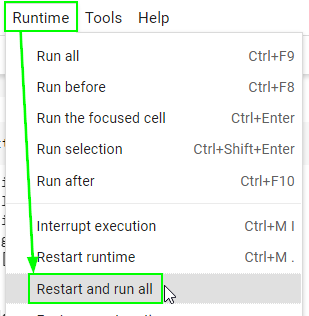

In [105]:
print('🎯 Restart and run all successful')

🎯 Restart and run all successful
